In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('SP500.csv')
data.head()

,DATE,SP500
0,2023-09-19,4443.95
1,2023-09-20,4402.2
2,2023-09-21,4330.0
3,2023-09-22,4320.06
4,2023-09-25,4337.44


In [4]:
data.tail()

,DATE,SP500
258,2024-09-13,5626.02
259,2024-09-16,5633.09
260,2024-09-17,5634.58
261,2024-09-18,5618.26
262,2024-09-19,5713.64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    263 non-null    object
 1   SP500   263 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [6]:
data['SP500'] = pd.to_numeric(data['SP500'], errors='coerce')

C:\Users\SaiCharan Ritwik\Downloads\ANACONDA\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='SP500', ylabel='Density'>

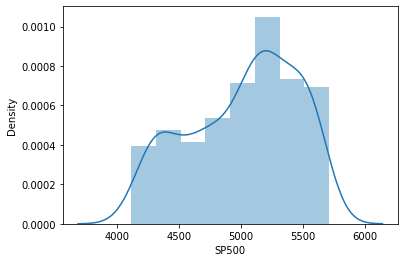

In [7]:
sns.distplot(data['SP500'])

#### Drop rows with missing values.

In [8]:
data = data.dropna()

In [9]:
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.sort_values('DATE')

#### Calculating the daily returns.

In [11]:
data['Daily_Return'] = data['SP500'].pct_change()

In [12]:
data = data.dropna()

#### Statistics of daily return.

In [13]:
mean_return = data['Daily_Return'].mean()
mean_return

0.001030124255655195

In [14]:
std_return = data['Daily_Return'].std()
std_return

0.008055104199411424

### Simulation.

In [15]:
current_price = data['SP500'].iloc[-1]    # The latest price of crude oil.
trading_days = 8
simulations = 1000             

In [16]:
np.random.seed(42)
simulated_prices = np.zeros((simulations, trading_days))

In [17]:
for i in range(simulations):
    daily_returns = np.random.normal(mean_return, std_return, trading_days)
    price_path = current_price * np.exp(np.cumsum(daily_returns))
    simulated_prices[i, :] = price_path

In [18]:
final_prices = simulated_prices[:, -1]

In [19]:
mean_predicted_price = np.mean(final_prices)
median_predicted_price = np.median(final_prices)
lower_bound = np.percentile(final_prices, 5)
upper_bound = np.percentile(final_prices, 95)

mean_predicted_price, median_predicted_price, lower_bound, upper_bound

(5761.034625903932, 5756.6117099667545, 5549.169268129981, 5969.222704440727)